In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#file path
csv_path = "../Resources/crimedata_33556_5y.csv"
crime_data_df = pd.read_csv(csv_path)
crime_data_df.head(10)

,OBJECTID,Case Number,Crime Type,Crime Type Extension,Reported Date,Address,zip
0,867123,2016-121422,DUI,DUI (DRIVING UNDER INFLUENCE),02/21/2016,GUNN HW / BINDER RD,33556
1,878464,2016-232857,TRAFFIC,Property Damage,04/06/2016,GUNN HW / SOUTH MOBLEY RD,33556
2,886845,2016-314411,TRAFFIC,Property Damage,05/08/2016,CARDEN DR / VANDERBILT DR,33556
3,888912,2016-334654,TRAFFIC,Non Incapacitating Injury,05/16/2016,VAN DYKE RD / RAMBLEWOOD RD,33556
4,890572,2016-351520,DUI,DUI (DRIVING UNDER INFLUENCE),05/23/2016,18900 BLOCK GUNN HW,33556
5,895461,2016-402536,MISCHIEF,CRIMINAL MISCHIEF FELONY,06/11/2016,8900 BLOCK DONNA LU DR,33556
6,917270,2016-635976,THEFT,THEFT VEHICLE & OTHER MOBILE,09/12/2016,19100 BLOCK BECKETT DR,33556
7,923098,2016-696270,TRAFFIC,Property Damage,10/05/2016,GUNN HW / SOUTH MOBLEY RD,33556
8,925205,2016-718640,TRAFFIC,Property Damage,10/14/2016,LUTZ LAKE FERN RD / STILL WOOD DR,33556
9,926161,2016-728176,TRAFFIC,Property Damage,10/18/2016,CRAWLEY RD / BOY SCOUT RD,33556


In [2]:
#identify columns names used in the data
crime_data_df.columns

Index(['OBJECTID', 'Case Number', 'Crime Type', 'Crime Type Extension',
       'Reported Date', 'Address', 'zip'],
      dtype='object')

In [3]:
#remove some columns from the data 
reduced_crime_data_df = crime_data_df.loc[:, ['Reported Date', 'Case Number', 'Crime Type', 'Crime Type Extension'
       , 'zip']]
reduced_crime_data_df.head(10)

,Reported Date,Case Number,Crime Type,Crime Type Extension,zip
0,02/21/2016,2016-121422,DUI,DUI (DRIVING UNDER INFLUENCE),33556
1,04/06/2016,2016-232857,TRAFFIC,Property Damage,33556
2,05/08/2016,2016-314411,TRAFFIC,Property Damage,33556
3,05/16/2016,2016-334654,TRAFFIC,Non Incapacitating Injury,33556
4,05/23/2016,2016-351520,DUI,DUI (DRIVING UNDER INFLUENCE),33556
5,06/11/2016,2016-402536,MISCHIEF,CRIMINAL MISCHIEF FELONY,33556
6,09/12/2016,2016-635976,THEFT,THEFT VEHICLE & OTHER MOBILE,33556
7,10/05/2016,2016-696270,TRAFFIC,Property Damage,33556
8,10/14/2016,2016-718640,TRAFFIC,Property Damage,33556
9,10/18/2016,2016-728176,TRAFFIC,Property Damage,33556


In [4]:
#columns to use in the table below 
columns = [
    "Reported Date", "Case Number", "Crime Type", "Crime Type Extension", "zip"
]
#create a new DF for non Traffic related crimes
data_crime_no_traffic_df = reduced_crime_data_df.loc[reduced_crime_data_df["Crime Type"] != "TRAFFIC", columns]
data_crime_no_traffic_df.head(10)


,Reported Date,Case Number,Crime Type,Crime Type Extension,zip
0,02/21/2016,2016-121422,DUI,DUI (DRIVING UNDER INFLUENCE),33556
4,05/23/2016,2016-351520,DUI,DUI (DRIVING UNDER INFLUENCE),33556
5,06/11/2016,2016-402536,MISCHIEF,CRIMINAL MISCHIEF FELONY,33556
6,09/12/2016,2016-635976,THEFT,THEFT VEHICLE & OTHER MOBILE,33556
10,11/02/2016,2016-764260,DRUGS,DRUGS/NARCOTICS,33556
13,12/27/2016,2016-899030,FIRE,FIRE INVESTIGATION,33556
18,05/22/2017,2017-363885,DRUGS,DRUGS/NARCOTICS,33556
23,07/31/2017,2017-542095,BURGLARY,BURGLARY BUSINESS/ FORCED,33556
25,09/06/2017,2017-638525,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,33556
27,03/25/2018,2018-206522,DUI,DUI (DRIVING UNDER INFLUENCE),33556


In [5]:
#count all non traffic related crimes
data_crime_no_traffic_df["Case Number"].count()

425

In [6]:
#list of crimes and count
crime_type = data_crime_no_traffic_df.groupby("Crime Type")
crime_type["Case Number"].count()

Crime Type
ARSON        2
ASSAULT      5
BATTERY     62
BURGLARY    70
DRUGS       44
DUI         34
FIRE         4
FRAUD       81
HARASS       2
MISCHIEF    41
MURDER       1
THEFT       79
Name: Case Number, dtype: int64

In [7]:
#dates when a crime had been recorded
crime_date = data_crime_no_traffic_df.groupby("Reported Date")
crime_date["Case Number"].count()

Reported Date
01/05/2020    1
01/08/2020    1
01/09/2017    1
01/12/2020    1
01/13/2017    2
             ..
12/25/2020    1
12/27/2016    1
12/27/2020    1
12/29/2019    1
12/31/2018    1
Name: Case Number, Length: 369, dtype: int64

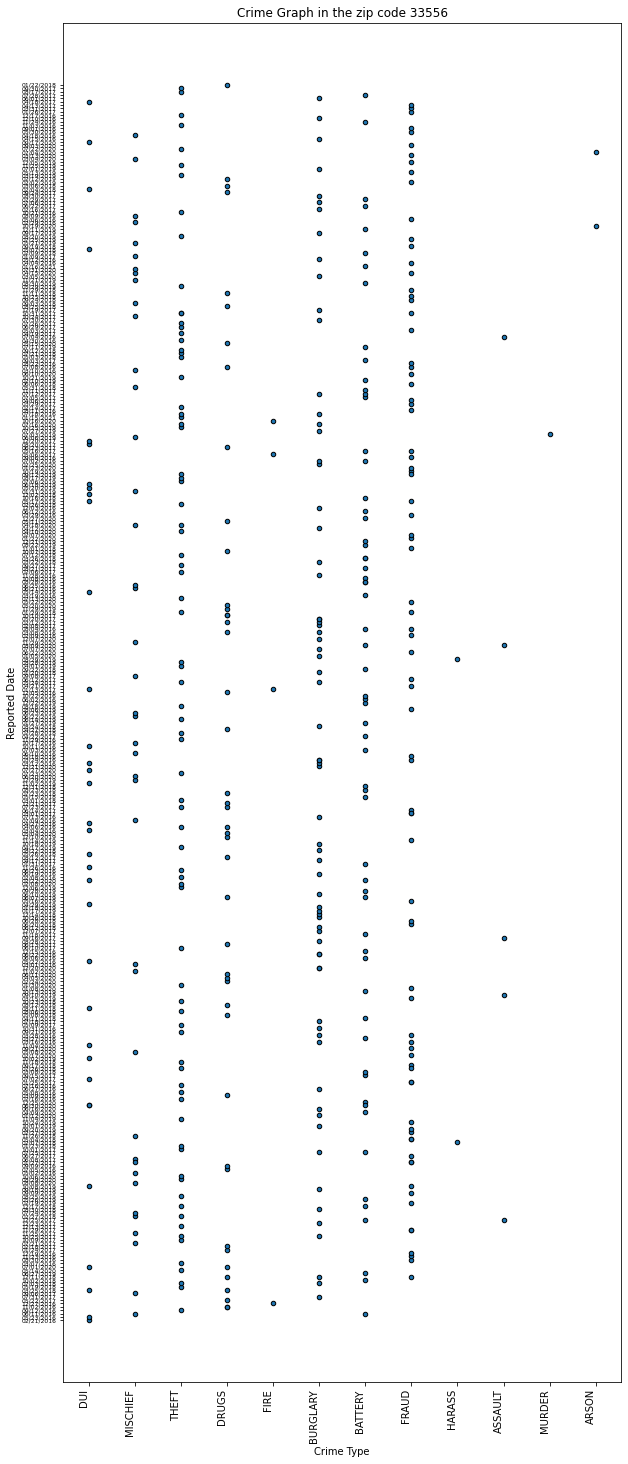

In [8]:
data_crime_no_traffic_df.plot(kind="scatter", x="Crime Type", y="Reported Date", figsize=(10,25),
                              facecolors="red", edgecolors="black", title="Crime Graph in the zip code 33556")
plt.xticks(rotation=90,  horizontalalignment='right', fontweight='light', fontsize='medium',)
plt.yticks(horizontalalignment='right', fontweight='light', fontsize=6)
plt.show()